<a href="https://colab.research.google.com/github/mounicasatraboina/-MOUNICA_INFO5731_Fall2021/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Reading & formatting trainig dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving stsa-train.txt to stsa-train (1).txt


In [ ]:
import pandas as pd
data = open('stsa-train.txt').read()
labels, text = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split(' ')
    labels.append(content[0])
    text.append(" ".join(content[1:]))

In [ ]:
# Reeading & formatting trainig dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()
testingdata = open('stsa-test.txt').read()
test_labels, test_text = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split(' ')
    test_labels.append(content[0])
    test_text.append(" ".join(content[1:]))

Saving stsa-test.txt to stsa-test (1).txt


In [ ]:
# creating dataframe
df = pd.DataFrame (list(zip(text, labels)) , columns = ['Raw Text', 'Labels'])
test_df = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['Raw Text', 'Labels'])
test_df = test_df.dropna()

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> M
Command 'M' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package bro

True

In [ ]:
#cleaning the data
import nltk
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')
df['Lower Case'] = df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tokenization'] = df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
test_df['Lower Case'] = test_df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['Removal of Punctuation'] = test_df['Lower Case'].str.replace('[^\w\s]','')
test_df['Removal of Special Characters'] = test_df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
test_df['Stopwords Removal'] = test_df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_df['Tokenization'] = test_df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
test_df['After Lemmatization'] = test_df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [ ]:
#Transformiting the  data
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(df['After Lemmatization'])
x_tfidf =  tfidf_vect.transform(df['After Lemmatization'])
vect_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vect.vocabulary_)
vect_test.fit(test_df['After Lemmatization'])
xtest = vect_test.transform(test_df['After Lemmatization'])
test_y = test_df['Labels']

In [ ]:
#splitting data 
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Labels'].values,test_size=0.2)
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [ ]:
#MultinominalNB
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(train_x, train_y)
naive_bayes_predictions_validation_data = naive_bayes_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
#cross validation score
nb_scores_mean = cross_validation_score(naive_bayes_model, valid_x, valid_y)
print(' Cross Validation Score is {0}'.format(nb_scores_mean))

Accuracy is 0.7891696750902527
Precision is 0.7891696750902527
Recall is 0.7891696750902527
F1 is 0.7891696750902528
 Cross Validation Score is 0.7357053487644667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
#metrics and cross validation testing
naive_bayes_predictions_test_data = naive_bayes_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
nb_test_scores_mean = cross_validation_score(naive_bayes_model, xtest, test_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.914896691229591
Precision is 0.914896691229591
Recall is 0.914896691229591
F1 is 0.914896691229591
Navie Bayes Cross Validation Score is 0.7838452652036467


In [ ]:
# validation and cross validation score by SVM
SVM_design = svm.SVC()
SVM_design.fit(train_x, train_y)
svm_predictions_validation_data = SVM_design.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
svm_scores_mean = cross_validation_score(SVM_design, valid_x, valid_y)
print('SVM Cross Validation Score is {0}'.format(svm_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.771841155234657
Precision is 0.771841155234657
Recall is 0.771841155234657
F1 is 0.771841155234657
SVM Cross Validation Score is 0.7183766030653738


In [ ]:
#metrics and cross validation score testing 
svm_predictions_test_data = SVM_design.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
svm_test_scores_mean = cross_validation_score(SVM_design, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.9500072243895391
Precision is 0.9500072243895391
Recall is 0.9500072243895391
F1 is 0.9500072243895391
SVM Cross Validation Score is 0.777055860003837


In [ ]:
#KNN and Cross validation Score
from sklearn.neighbors import KNeighborsClassifier
knn_design = KNeighborsClassifier(n_neighbors = 15)
knn_design.fit(train_x, train_y)
knn_predictions_valid_data = knn_design.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
knn_scores_mean = cross_validation_score(knn_design, valid_x, valid_y)
print('KNN Cross Validation Score is {0}'.format(knn_scores_mean))
#testing
knn_predictions_test_data = knn_design.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
#cross validation score
knn_test_scores_mean = cross_validation_score(knn_design, xtest, test_y)
print('KNN Cross Validation Score is {0}'.format(knn_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.7357400722021661
Precision is 0.7357400722021661
Recall is 0.7357400722021661
F1 is 0.7357400722021662
KNN Cross Validation Score is 0.715478052340736


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.7867360208062418
Precision is 0.7867360208062418
Recall is 0.7867360208062418
F1 is 0.7867360208062419
KNN Cross Validation Score is 0.708426336027492


In [ ]:
# Tree validation,Cross validation and Testing metrics cross validation score
from sklearn.tree import DecisionTreeClassifier
dectree_model = DecisionTreeClassifier()
dectree_model.fit(train_x, train_y)
dt_predictions_valid_data = dectree_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
dt_scores_mean = cross_validation_score(dectree_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_scores_mean))
dt_predictions_test_data = dectree_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
dt_test_scores_mean = cross_validation_score(dectree_model, xtest, test_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.6505415162454874
Precision is 0.6505415162454874
Recall is 0.6505415162454874
F1 is 0.6505415162454874
Decision Tree Cross Validation Score is 0.6273381294964029
Accuracy is 0.9294899580985406
Precision is 0.9294899580985406
Recall is 0.9294899580985406
F1 is 0.9294899580985406


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Decision Tree Cross Validation Score is 0.6530822260591047


In [ ]:
#Cross validation score,Random Forest validation and  Testing metrics cross validation score
from sklearn.ensemble import RandomForestClassifier
ranfor_model = RandomForestClassifier()
ranfor_model.fit(train_x, train_y)
rf_predictions_valid_data = ranfor_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
rf_scores_mean = cross_validation_score(ranfor_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_scores_mean))
ranfor_predictions_test_data = ranfor_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(ranfor_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
rf_test_scores_mean = cross_validation_score(ranfor_model, xtest, test_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.7422382671480144
Precision is 0.7422382671480144
Recall is 0.7422382671480144
F1 is 0.7422382671480146
Random Forest Cross Validation Score is 0.6642477322489835


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.9478399075278139
Precision is 0.9478399075278139
Recall is 0.9478399075278139
F1 is 0.9478399075278139
Random Forest Cross Validation Score is 0.7387656498928175


In [ ]:
#Cross validation score and Testing metrics cross validation score,XGBOST Validation,
from xgboost import XGBClassifier
xg_boostmodel = XGBClassifier()
xg_boostmodel.fit(train_x, train_y)
xg_predictions_valid_data = xg_boostmodel.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
xg_scores_mean = cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_scores_mean))
xg_predictions_test_data = xg_boostmodel.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))
xg_test_scores_mean = cross_validation_score(XGBClassifier(), xtest, test_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.6462093862815884
Precision is 0.6462093862815884
Recall is 0.6462093862815884
F1 is 0.6462093862815884
XG Boost Cross Validation Score is 0.6007037847982484
Accuracy is 0.698020517266291
Precision is 0.698020517266291
Recall is 0.698020517266291
F1 is 0.698020517266291
XG Boost Cross Validation Score is 0.6436893710015097


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [1]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
data_df = pd.read_csv('netflix_titles.csv')

In [6]:
print("Shape: {0}".format(data_df.shape))

Shape: (8807, 12)


In [7]:
cluster_data_df = data_df.head(1000)
cluster_data_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,Vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir..."
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...
997,s998,TV Show,Life in Color with David Attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e..."
998,s999,Movie,Searching For Sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...


In [9]:
# Special characters removal
cluster_data_df['After noise removal'] = cluster_data_df['description'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')

# Stopwords removal
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As father nears end life filmmaker Kirsten Joh...,as father nears end life filmmaker kirsten joh...,"[as, father, nears, end, life, filmmaker, kirs...",as father near end life filmmak kirsten johnso...,a father near end life filmmak kirsten johnson...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths party Cape Town teen sets...,after crossing paths party cape town teen sets...,"[after, crossing, paths, party, cape, town, te...",after cross path parti cape town teen set prov...,after cross path parti cape town teen set prov...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect family powerful drug lord skilled t...,to protect family powerful drug lord skilled t...,"[to, protect, family, powerful, drug, lord, sk...",to protect famili power drug lord skill thief ...,to protect famili power drug lord skill thief ...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amo...,Feuds flirtations and toilet talk go down amo...,Feuds flirtations and toilet talk go down amo...,Feuds flirtations toilet talk go among incarce...,feuds flirtations toilet talk go among incarce...,"[feuds, flirtations, toilet, talk, go, among, ...",feud flirtat toilet talk go among incarcer wom...,feud flirtat toilet talk go among incarcer wom...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In city coaching centers known train India fin...,in city coaching centers known train india fin...,"[in, city, coaching, centers, known, train, in...",in citi coach center known train india finest ...,in citi coach center known train india finest ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,Vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",In 1974 a rural town in Anatolia gets its fir...,In 1974 a rural town in Anatolia gets its fir...,In a rural town in Anatolia gets its first t...,In rural town Anatolia gets first television s...,in rural town anatolia gets first television s...,"[in, rural, town, anatolia, gets, first, telev...",in rural town anatolia get first televis set e...,in rural town anatolia get first televis set e.

In [10]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 4421)

In [12]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [13]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.00285372, 0.01170947, 0.        , ..., 0.        , 0.0034694 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00638799, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
terms1 = tfidf_vect.get_feature_names()

In [15]:
terms1[1:10]

['abandon',
 'abatutu',
 'abbey',
 'abduct',
 'abid',
 'abil',
 'abl',
 'aboard',
 'abound']

In [16]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0014038506258041178

In [17]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As father nears end life filmmaker Kirsten Joh...,as father nears end life filmmaker kirsten joh...,"[as, father, nears, end, life, filmmaker, kirs...",as father near end life filmmak kirsten johnso...,a father near end life filmmak kirsten johnson...,7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths party Cape Town teen sets...,after crossing paths party cape town teen sets...,"[after, crossing, paths, party, cape, town, te...",after cross path parti cape town teen set prov...,after cross path parti cape town teen set prov...,6
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,To protect family powerful drug lord skilled t...,to protect family powerful drug lord skilled t...,"[to, protect, family, powerful, drug, lord, sk...",to protect famili power drug lord skill thief ...,to protect famili power drug lord skill thief ...,5
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amo...,Feuds flirtations and toilet talk go down amo...,Feuds flirtations and toilet talk go down amo...,Feuds flirtations toilet talk go among incarce...,feuds flirtations toilet talk go among incarce...,"[feuds, flirtations, toilet, talk, go, among, ...",feud flirtat toilet talk go among incarcer wom...,feud flirtat toilet talk go among incarcer wom...,3
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,In city coaching centers known train India fin...,in city coaching centers known train india fin...,"[in, city, coaching, centers, known, train, in...",in citi coach center known train india finest ...,in citi coach center known train india finest ...,7


In [19]:
df1.groupby(['Tfidf Clus Label'])['description'].count()

Tfidf Clus Label
0     90
1     76
2     93
3    228
4    112
5    156
6     49
7     47
8     76
9     73
Name: description, dtype: int64

In [20]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: one
 find
 anoth
 love
 when
 connect
 group
 may
 an
 after
Cluster 1: the
 life
 year
 singl
 love
 relationship
 old
 live
 take
 day
Cluster 2: back
 in
 get
 daughter
 when
 student
 move
 two
 help
 griev
Cluster 3: friend
 new
 adventur
 after
 world
 go
 must
 power
 take
 becom
Cluster 4: home
 murder
 coupl
 three
 mysteri
 come
 woman
 young
 famili
 attack
Cluster 5: team
 thi
 woman
 follow
 time
 famili
 documentari
 job
 live
 seri
Cluster 6: high
 school
 player
 friend
 final
 game
 relationship
 anticip
 famili
 teen
Cluster 7: filmmak
 from
 india
 comedian
 fashion
 artist
 life
 chef
 design
 dream
Cluster 8: stori
 true
 base
 live
 wealthi
 woman
 after
 inspir
 in
 man
Cluster 9: love
 embark
 marri
 journey
 challeng
 girl
 music
 song
 singer
 fall


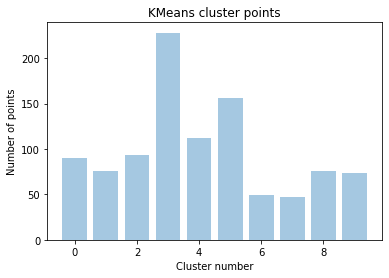

In [22]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [50]:
# Reading a description which belong to each group.

for i in range(10):
    print("4 description of ensured to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['description'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['description'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['description'])
    print('\n')
    print("_" * 70)

4 description of ensured to cluster  0
----------------------------------------------------------------------
A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.


While on a mission to return a missing pet, Naruto and two fellow ninjas are ambushed by brutal knights led by the enigmatic Temujin.


Bored with being the Lord of Hell, the devil relocates to Los Angeles, where he opens a nightclub and forms a connection with a homicide detective.


______________________________________________________________________
4 description of ensured to cluster  1
----------------------------------------------------------------------
Declassified documents reveal the post-WWII life of Otto Skorzeny, a close Hitler ally who escaped to Spain and became an adviser to world presidents.


A movie-loving 10-year-old and her blind little brother trek to meet Indian superstar Shah Rukh Khan for help in getting th

In [51]:

# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['description'].values)
bow.shape

(1000, 5755)

In [28]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [29]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [30]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.015569619601720843


In [43]:
cluster_data_df['Bow Clus Label'] = model.labels_ 
cluster_data_df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As father nears end life filmmaker Kirsten Joh...,as father nears end life filmmaker kirsten joh...,"[as, father, nears, end, life, filmmaker, kirs...",as father near end life filmmak kirsten johnso...,a father near end life filmmak kirsten johnson...,7,0,2
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths party Cape Town teen sets...,after crossing paths party cape town teen sets...,"[after, crossing, paths, party, cape, town, te...",after cross path parti cape town teen set prov...,after cross path parti cape town teen set prov...,6,0,4


In [45]:
from sklearn.cluster import DBSCAN
import numpy as np

minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if (len(dists) == 200 and dists[199] > dist): 
          l = int(lower_bound(dists, dist)) 
          if l < 200 and l >= 0 and dists[l] > dist:
              dists[l] = dist
        else:
          dists.append(dist)
          dists.sort()
    
    return dists[199]

In [33]:
list_of_sent_train = list()

for i in cluster_data_df["Lower casing"].values:
  list_of_sent_train.append(i.split())

In [46]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train, size=100, workers=4)

import numpy as np
sent_vectors = []; 
count = 1
for sent in list_of_sent_train: # for each description
    sent_vec = np.zeros(100)
    cnt_words =1; # num of words in description
    for word in sent: # for each word in a description
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)


twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()

# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [35]:
cluster_data_df['AVG-W2V Clus Label'] = model.labels_
cluster_data_df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As father nears end life filmmaker Kirsten Joh...,as father nears end life filmmaker kirsten joh...,"[as, father, nears, end, life, filmmaker, kirs...",as father near end life filmmak kirsten johnso...,a father near end life filmmak kirsten johnson...,7,7,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths party Cape Town teen sets...,after crossing paths party cape town teen sets...,"[after, crossing, paths, party, cape, town, te...",after cross path parti cape town teen set prov...,after cross path parti cape town teen set prov...,6,8,0


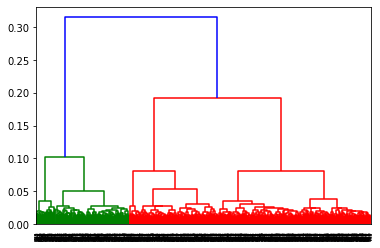

In [36]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10)

In [47]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

aggdfa = cluster_data_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As her father nears the end of his life filmm...,As father nears end life filmmaker Kirsten Joh...,as father nears end life filmmaker kirsten joh...,"[as, father, nears, end, life, filmmaker, kirs...",as father near end life filmmak kirsten johnso...,a father near end life filmmak kirsten johnson...,7,0,2
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths at a party a Cape Town t...,After crossing paths party Cape Town teen sets...,after crossing paths party cape town teen sets...,"[after, crossing, paths, party, cape, town, te...",after cross path parti cape town teen set prov...,after cross path parti cape town teen set prov...,6,0,2


In [39]:
aggdfa.groupby(['AVG-W2V Clus Label'])['description'].count()

AVG-W2V Clus Label
0    267
1    223
2    214
3     55
4    241
Name: description, dtype: int64

In [48]:
for i in range(5):
    print("2 description of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['description'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['description'])
    print('\n')
    print("_" * 70)

2 description of assigned to cluster  0
----------------------------------------------------------------------
After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.


A tangled love triangle ensues when a man falls for a woman studying to become a nun — and she falls for the friend he enlists to help him pursue her.


______________________________________________________________________
2 description of assigned to cluster  1
----------------------------------------------------------------------
Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.


A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.


______________________________________________________________________
2 description of assigned to cluster

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
'''k-means : It assigns records to each cluster using a pre-specified number of clusters to 
discover the mutually exclusive cluster of spherical form based on distance.
Convergence is ensured, with a focus on clusters of all sizes and forms.
Hierachical clustering: Both divisive and agglomerative hierarchical approaches exist.Ease of use for every 
sort of similarity or distance, and thus applicability to any attribute type.
DBSCAN: The shape of the clusters created is random, and feature sizes may differ.Outliers and noisy datasets are no
match for DBScan clustering.'''


